# **Data Overview**

Here each data point corresponds to trip of flight from one city to another.

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price(target): The price of the ticket

# Study Questions for Descriptive Analytics

How do the ticket prices vary between Economy and Business class?

How do the ticket prices vary between Airlines?

Does the flight duration effect ticket prices?

Does the number of stops effect ticket prices?

Do the days left to departure effect ticket prices?

Do the departure time and the arrival time effect ticket prices?

Do the Source City and Destination City effect ticket prices?

Which features effect the ticket prices mostly?

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
import scipy.stats as stats
%matplotlib inline
import warnings
from sklearn import metrics
import sklearn.datasets

In [ ]:
df=pd.read_csv(r'/content/Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Here we remove this unnamed coloumn to make the dataset clean

In [ ]:
df = df.drop('Unnamed: 0',axis=1)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df.shape

(300153, 11)

In [ ]:
df.size

3301683

In [ ]:
df.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [ ]:
numerical_features = [n for n in df.columns if df[n].dtype!='O']
df[numerical_features].head()

,duration,days_left,price
0,2.17,1,5953
1,2.33,1,5953
2,2.17,1,5956
3,2.25,1,5955
4,2.33,1,5955


This column tells numerical data columns

In [ ]:
categorical_features = [c for c in df.columns if df[c].dtype=='O']
df[categorical_features].head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy


This data tells categorical data

### Statistical Description of Data

In [ ]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [ ]:
print(df['price'].median())

7425.0


Text(0.5, 0, 'Price')

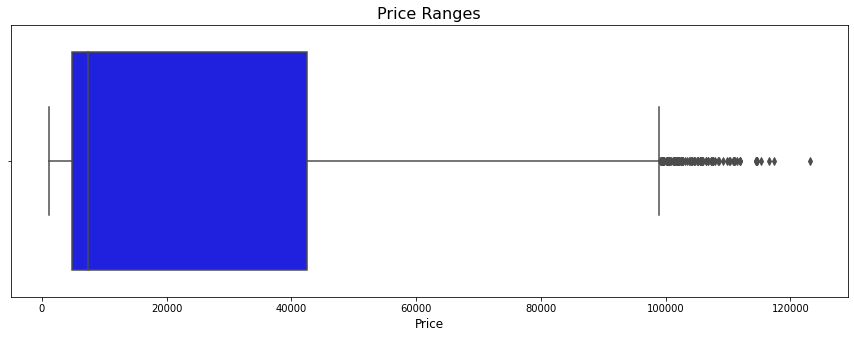

In [ ]:
plt.figure(figsize = (15,5))


sns.boxplot(x = 'price', data = df, color="blue")
plt.title('Price Ranges',fontsize=16)
plt.xlabel('Price',fontsize=12)



Text(0, 0.5, 'The Number of Flights')

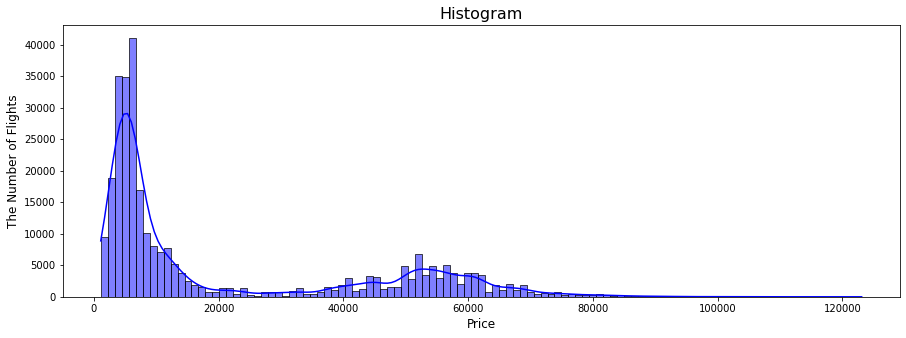

In [ ]:
plt.figure(figsize = (15,5))


sns.histplot(x = 'price', data = df, kde = True, color="blue")
plt.title('Histogram',fontsize=16)
plt.xlabel('Price',fontsize=12)
plt.ylabel('The Number of Flights',fontsize=12)

Mean Price:20889.660523, Median Price:7425.0. The histogram graph shows a right-skewed distribution(Mean>Median). The Majority of prices is between 1000 - 20000 Rs.

### How do the ticket prices vary between Economy and Business class?

To understand the price difference between the economy and business class plot the price histogram for economy and business seperately.

In [ ]:
df1 = df.loc[df["class"]=='Economy']
df2 = df.loc[df["class"]=='Business']

In [ ]:
df1.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df2.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
206666,Air_India,AI-868,Delhi,Evening,zero,Evening,Mumbai,Business,2.00,1,25612
206667,Air_India,AI-624,Delhi,Evening,zero,Night,Mumbai,Business,2.25,1,25612
206668,Air_India,AI-531,Delhi,Evening,one,Night,Mumbai,Business,24.75,1,42220
206669,Air_India,AI-839,Delhi,Night,one,Night,Mumbai,Business,26.50,1,44450
206670,Air_India,AI-544,Delhi,Evening,one,Night,Mumbai,Business,6.67,1,46690


In [ ]:
df1['price'].median()

5772.0

In [ ]:
df2['price'].median()

53164.0

In [ ]:
df1['price'].mean()

6572.342383362527

In [ ]:
df2['price'].mean()

52540.08112357868

Text(0.5, 1.0, 'Economy class')

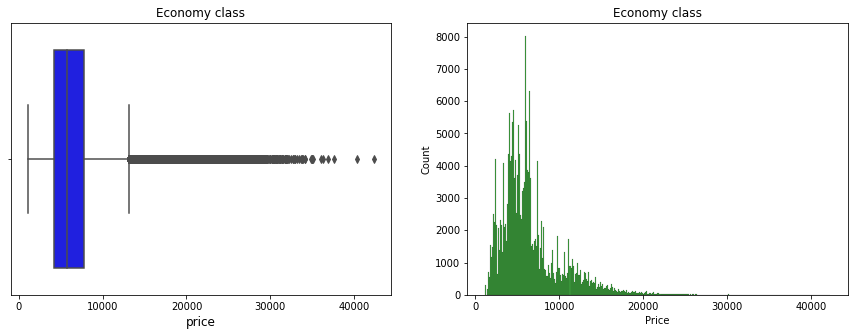

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(x='price',data=df1,color='blue')
plt.xlabel('price',fontsize=12)
plt.title('Economy class')


plt.subplot(1,2,2)
sns.histplot(x='price',data=df1,color='green')
plt.xlabel('Price')
plt.title('Economy class')

Text(0.5, 1.0, 'Business class')

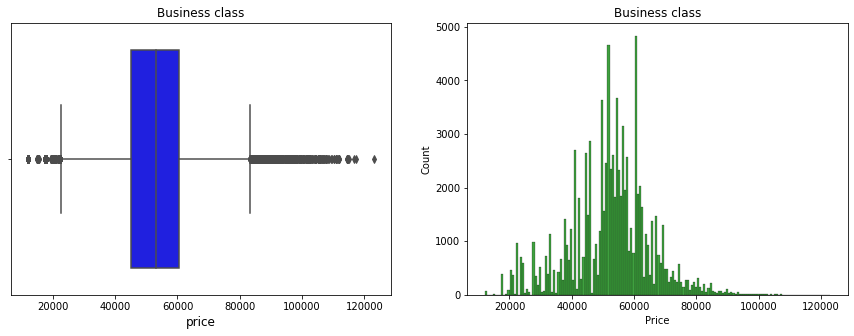

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(x='price',data=df2,color='blue')
plt.xlabel('price',fontsize=12)
plt.title('Business class')


plt.subplot(1,2,2)
sns.histplot(x='price',data=df2,color='green')
plt.xlabel('Price')
plt.title('Business class')

As we see through above plots Economy class have median of 5772 and the mean of 6572
and in Business Class have median of 53164 and the mean of 52540.

As we can see the economy avg price vary around 8 times lesser than economy class.

### How do the ticket prices vary between Airlines?

<Axes: xlabel='airline', ylabel='price'>

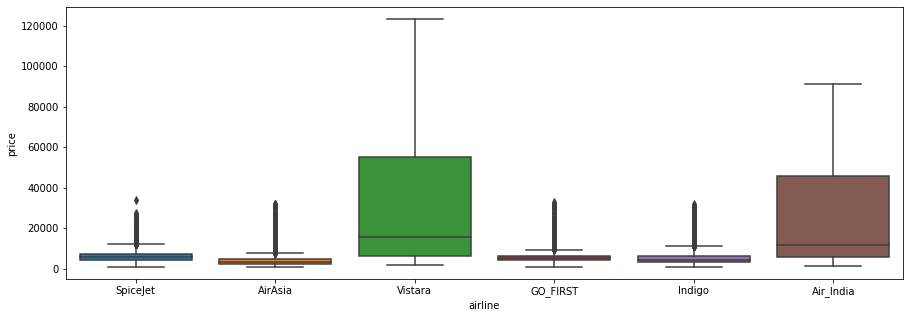

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['airline'],y=df['price'])

Vistara and Air_India have higher price distribution range because of the economy and business class variety in these both flights

Hence we will plot another graph by differentiating between economy and business classes of the of two airlines

<Axes: xlabel='airline', ylabel='price'>

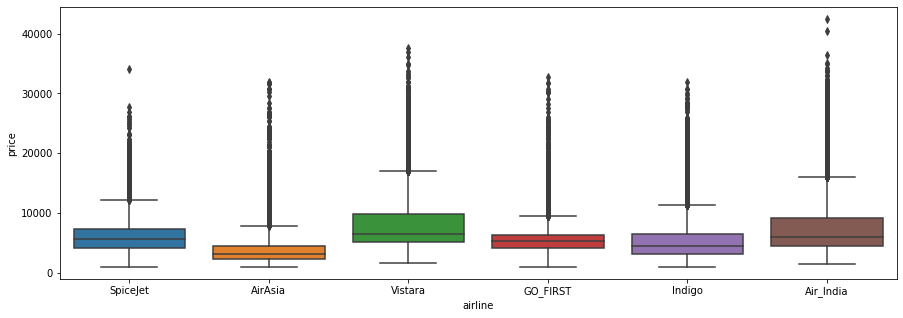

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x = 'airline', y='price',data= df1)

<Axes: xlabel='airline', ylabel='price'>

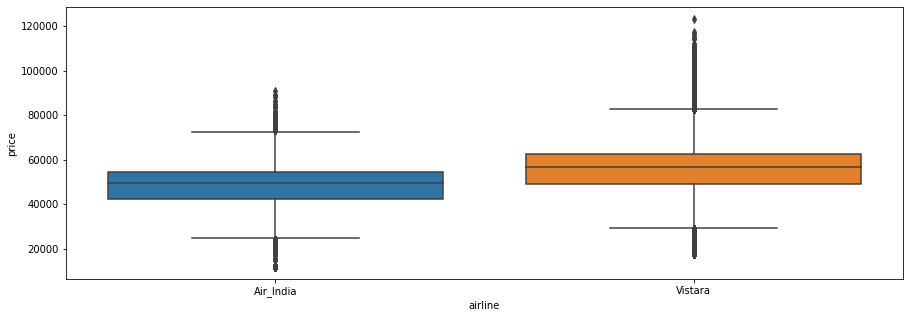

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x='airline',y='price',data=df2)

In economy class and business class Vistara Airline have higher number of tickets sales.Whereas in economy class AirAisa have least number of price  of ticket.



### Does the flight duration effect ticket prices?

In [ ]:
dfduration = df.groupby(['duration'])['price'].mean().reset_index()

<Axes: xlabel='duration', ylabel='price'>

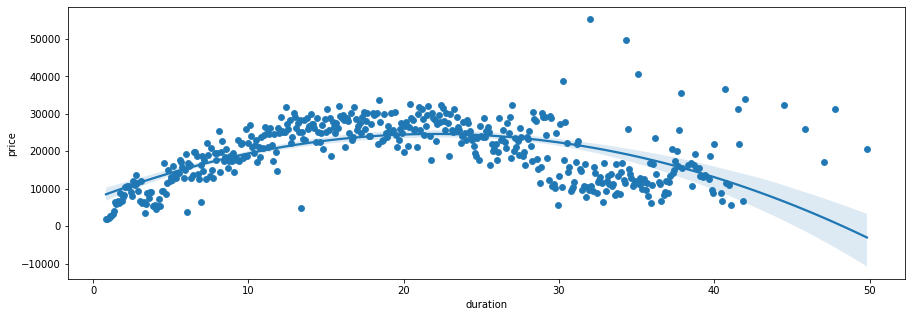

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='duration',y='price',data=dfduration)
sns.regplot(data=dfduration, x="duration", y="price", order=2)

As per the graph , the prices of ticket rises till duration of 20 mintues,then it decreases gradually from 20 minutes to 50 mintutes

### Does the number of stops effect ticket prices?

Text(0.5, 1.0, 'Plotting by Economy class')

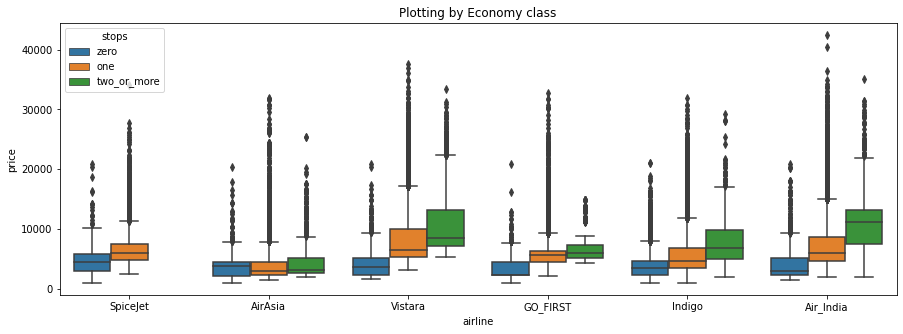

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x='airline',y='price',hue='stops',data=df1)
plt.title('Plotting by Economy class')

Text(0.5, 1.0, 'Plotting by Business class')

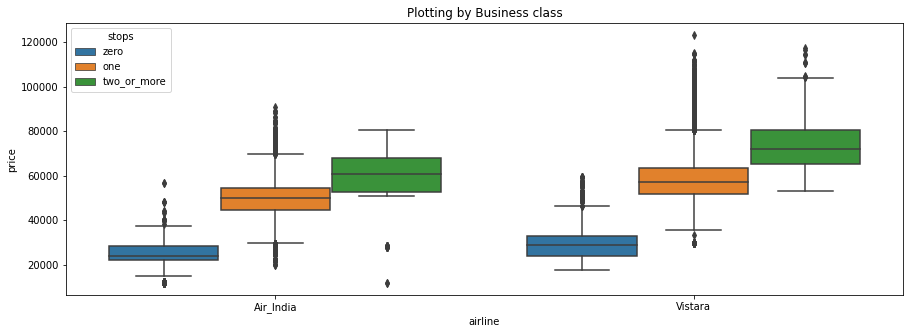

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x='airline',y='price',hue='stops',data=df2)
plt.title('Plotting by Business class')

As per the above graphs 

In economy class the no of stops does affect the ticket price of airlines, higher no of stops , higher the price

In Business class the no of stops does  affect the ticket price of airlines, higher no of stops , higher the price

### Do the days left to departure effect ticket prices?

In [ ]:
dfdaysleft = df.groupby(['days_left'])['price'].mean().reset_index()

<Axes: xlabel='days_left', ylabel='price'>

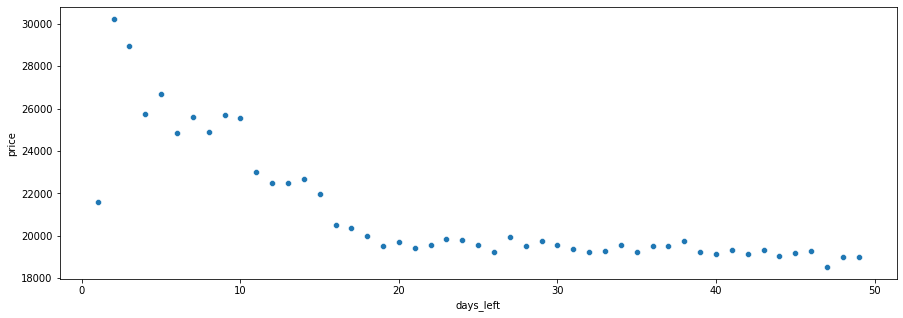

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='days_left',y='price',data=dfdaysleft)

Prices rises when days are lesser as compared to the prices are cheaper when days_left is greater

### Do the departure time and the arrival time effect ticket prices?



<Axes: xlabel='departure_time', ylabel='price'>

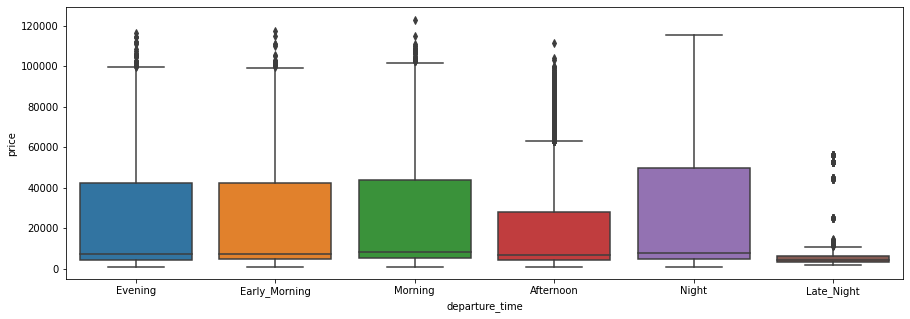

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x='departure_time',y='price',data=df)

<Axes: xlabel='arrival_time', ylabel='price'>

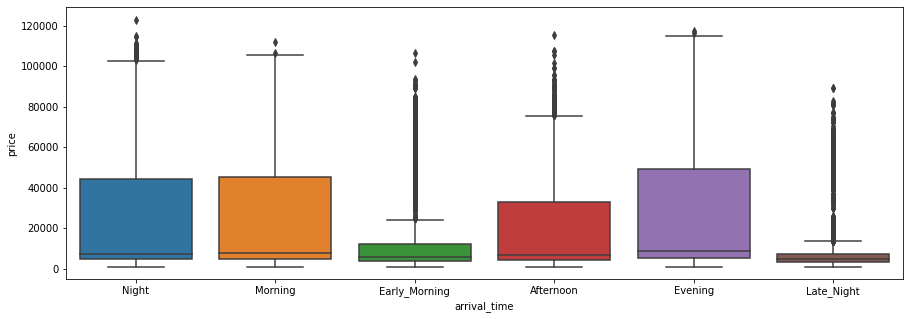

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x='arrival_time',y='price',data=df)

arrival time : Early mornings and late night are cheapest.

departure time :Late Nights are cheaper.
    
arrival time: Evening flights are expensive.

departure time:Night flights are expensive.

### Do the Source City and Destination City effect ticket prices?

<Axes: xlabel='source_city', ylabel='price'>

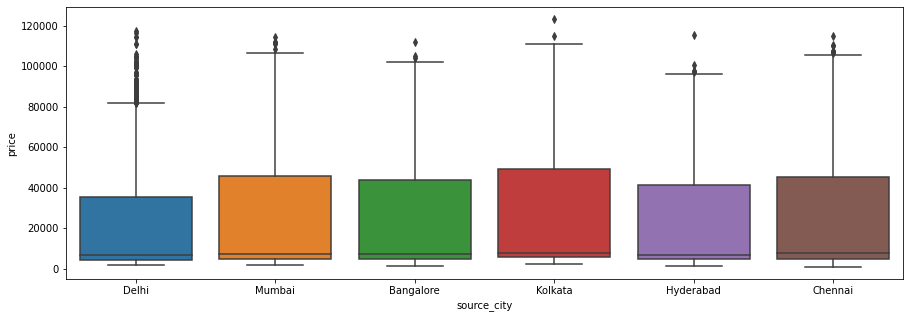

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x='source_city',y='price',data=df)

<Axes: xlabel='destination_city', ylabel='price'>

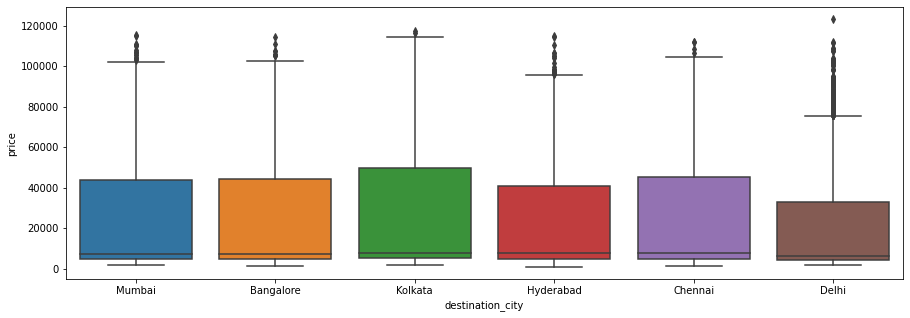

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x='destination_city',y='price',data=df)

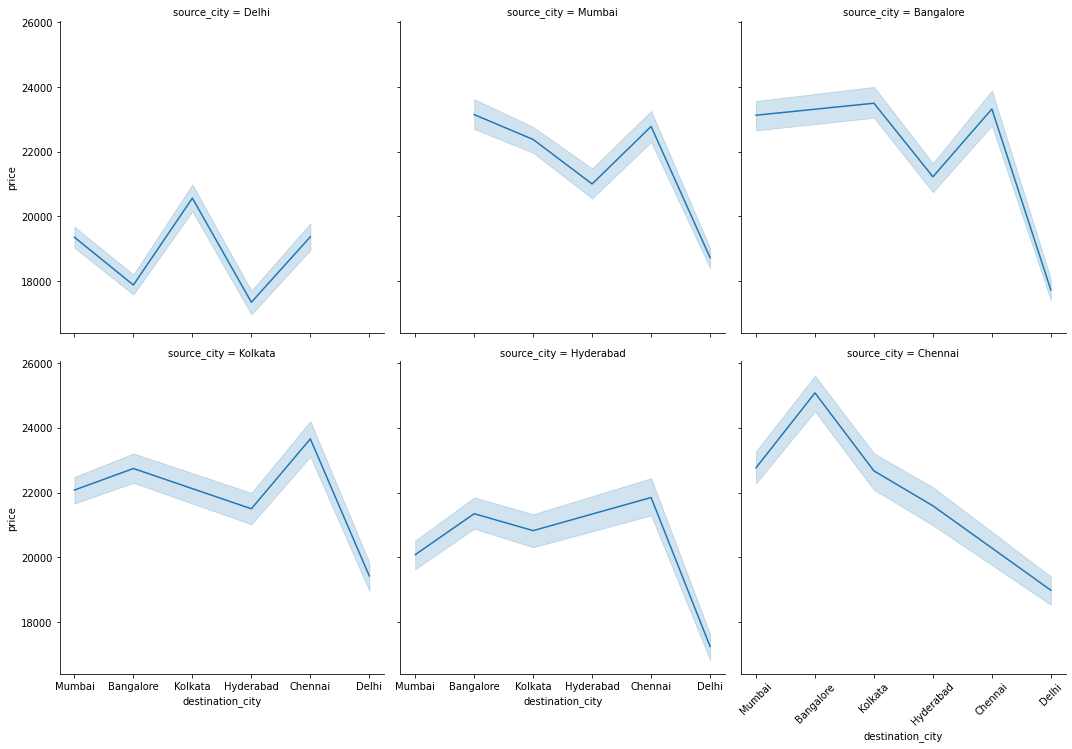

In [ ]:
sns.relplot(col='source_city',x='destination_city',y='price',kind='line',data=df,col_wrap=3)
plt.xticks(rotation=45)
plt.show()

Flights leaving from or arriving at Delhi have the cheaper prices compared to other source and destination cities. On the other hand, other source and destination cities have similar price ranges

## Which features effect the ticket prices mostly?

In [ ]:
def preprocessing(df):
    df['stops']=df['stops'].replace({'zero':0,'one':1,'two_or_more':2}).astype(int)
    df['class']=df['class'].replace({'Economy':0,'Business':1}).astype(int)
    dummy_variables= ["airline","source_city","destination_city","departure_time","arrival_time"]
    dummies= pd.get_dummies(df[dummy_variables],drop_first=True)
    
    df=pd.concat([df,dummies],axis=1)
    df= df.drop(["flight","airline","source_city","destination_city","departure_time","arrival_time"],axis=1)
    return df

In [ ]:
df_preprocessing = preprocessing(df)

In [ ]:
df_preprocessing.head()

,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
0,0,0,2.17,1,5953,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,2.33,1,5953,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,2.17,1,5956,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,0,2.33,1,5955,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


Correlation Analysis

In [ ]:
df_preprocessing.corr().T

,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
stops,1.000000,0.001027,0.468059,-0.008540,0.119648,0.060215,-0.033363,-0.172133,-0.087293,0.098758,...,0.010145,-0.041882,-0.035366,0.052600,-0.058166,-0.018657,0.070912,-0.018544,-0.045666,0.017965
class,0.001027,1.000000,0.138710,-0.013039,0.937860,0.124899,-0.194540,-0.275477,-0.118325,0.302116,...,-0.012120,0.010789,-0.029378,0.002801,0.049516,-0.041974,0.032833,-0.086238,0.039745,0.008035
duration,0.468059,0.138710,1.000000,-0.039157,0.204222,0.277283,-0.139380,-0.365953,0.008776,0.132430,...,-0.047092,0.104017,-0.045045,-0.071084,0.115464,0.010950,0.033094,-0.107301,0.122906,-0.064458
days_left,-0.008540,-0.013039,-0.039157,1.000000,-0.091949,-0.022721,0.030408,0.007839,-0.024414,-0.007002,...,0.003322,-0.010238,0.012000,-0.003206,0.004004,0.020204,-0.013737,0.026500,-0.003619,-0.004593
price,0.119648,0.937860,0.204222,-0.091949,1.000000,0.070041,-0.194179,-0.280882,-0.114019,0.360816,...,-0.012232,0.007946,-0.033768,0.018199,0.041768,-0.060449,0.056408,-0.093602,0.030379,0.020344
airline_Air_India,0.060215,0.124899,0.277283,-0.022721,0.070041,1.000000,-0.175687,-0.248781,-0.106858,-0.523242,...,0.033703,0.019692,-0.006956,-0.024826,0.010730,-0.025510,-0.040356,-0.059937,0.066735,-0.001920
airline_GO_FIRST,-0.033363,-0.194540,-0.139380,0.030408,-0.194179,-0.175687,1.000000,-0.118471,-0.050886,-0.249171,...,0.028405,-0.003699,0.008566,-0.040410,-0.025366,0.085654,-0.043881,0.100450,-0.063926,-0.000382
airline_Indigo,-0.172133,-0.275477,-0.365953,0.007839,-0.280882,-0.248781,-0.118471,1.000000,-0.072057,-0.352838,...,-0.032224,-0.020572,0.077697,0.028371,-0.072394,0.013864,0.007335,0.065025,-0.082781,-0.009271
airline_SpiceJet,-0.087293,-0.118325,0.008776,-0.024414,-0.114019,-0.106858,-0.050886,-0.072057,1.000000,-0.151553,...,0.033931,0.003626,-0.011630,-0.028322,0.005247,0.022834,-0.042162,0.003302,0.030808,0.013312
airline_Vistara,0.098758,0.302116,0.132430,-0.007002,0.360816,-0.523242,-0.249171,-0.352838,-0.151553,1.000000,...,-0.036206,-0.005037,-0.056948,0.056992,0.042486,-0.058766,0.091317,-0.135247,0.030260,0.024874


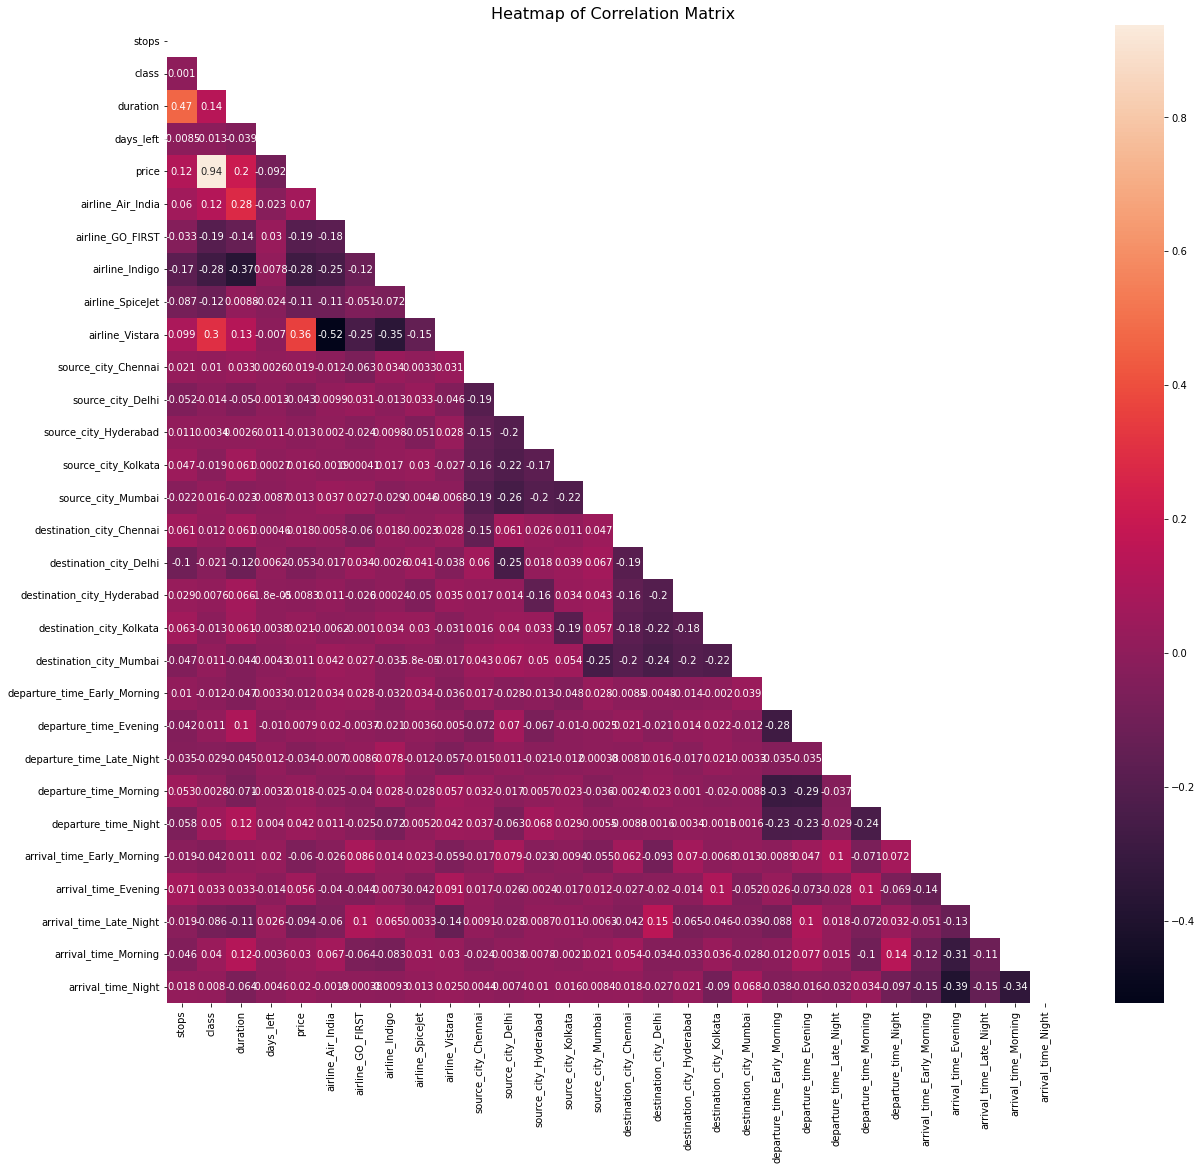

In [ ]:
mask = np.triu(np.ones_like(df_preprocessing.corr(),dtype=bool))
plt.figure(figsize =(20,18))
corrMatrix = df_preprocessing.corr()
sns.heatmap(corrMatrix,mask=mask,annot=True)
plt.title('Heatmap of Correlation Matrix',fontsize=16)
plt.show()

From the above  class and price have a greater correlation ie. they both are correlated and features depend on the class.

### 2. Predictive Analytics

In [ ]:
df_bk=df.copy()


In [ ]:
x=df.drop(['price'],axis=1)
y=df['price']

### Splitting the Data as Train and Test Sets

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((210107, 10), (90046, 10), (210107,), (90046,))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

Building Regression Models



In [117]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}
Results=pd.DataFrame(a)
Results.head()

,Model Name,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


In [118]:
from sklearn.linear_model import LinearRegression

modellr = LinearRegression()

MM = [modellr]

for models in MM:
    
    models.fit(x_train, y_train)

    y_pred = models.predict(x_test)
    
    print('Model Name: ', models)

    from sklearn import metrics
    
    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
    
    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')
    
    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    print('Adj R Squared: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Squared' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    Results = Results.append(new_row, ignore_index=True)

Model Name:  LinearRegression()
Mean Absolute Error (MAE): 4539.344
Mean Squared Error (MSE): 48167176.637
Root Mean Squared Error (RMSE): 6940.258
R2_score: 0.906411
Root Mean Squared Log Error (RMSLE): 8.845
Mean Absolute Percentage Error (MAPE): 42.49 %
Adj R Squared:  0.906408
------------------------------------------------------------------------------------------------------------


<ipython-input-118-397171005e31>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


In [119]:
Results

,Model Name,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score,Adj_R_Squared
0,LinearRegression(),4539.34428,6940.257678,42.491869,4.816718e+07,8.845094,0.906411,0.906408


 Linear Regression has the  R squared score:0.906411 and adjusted R square value:0.906408
 

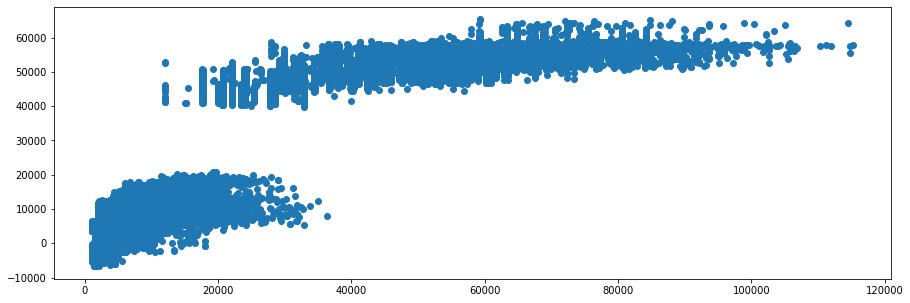

In [122]:
plt.figure(figsize=(15,5))
plt.scatter(y_test, y_pred)
